In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [2]:
circ = QuantumCircuit(3)

In [3]:
circ.cx(0, 1)
circ.cx(1, 2)
circ.h(0)

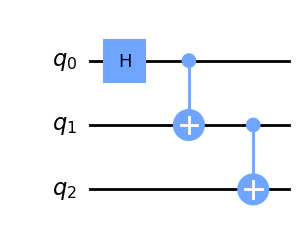

In [4]:
circ.draw('mpl')

In [5]:
from  qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**3)
state = state.evolve(circ)
state.draw('latex')

<IPython.core.display.Latex object>

In [6]:
from qiskit.visualization import array_to_latex

array_to_latex(state)

<IPython.core.display.Latex object>

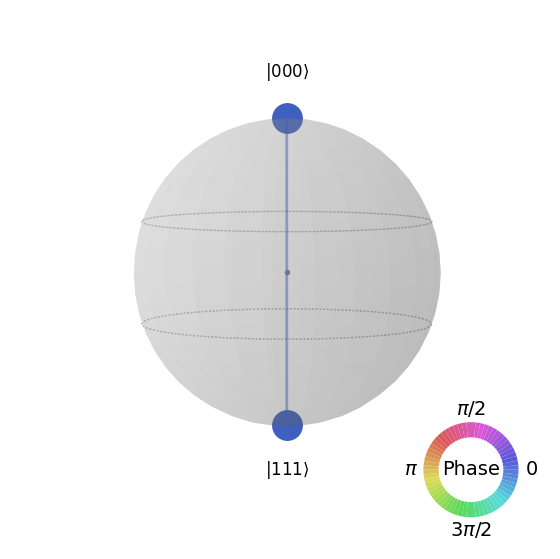

In [7]:
state.draw('qsphere')

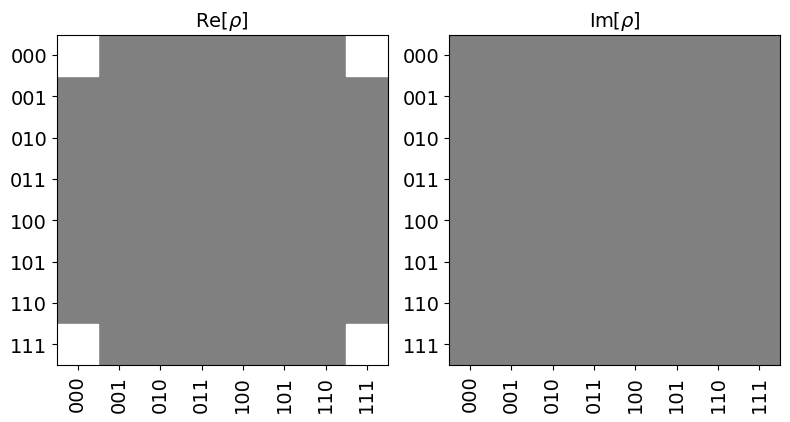

In [8]:
state.draw('hinton')

In [9]:
from qiskit.quantum_info import Operator

U = Operator(circ)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j,  0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.      

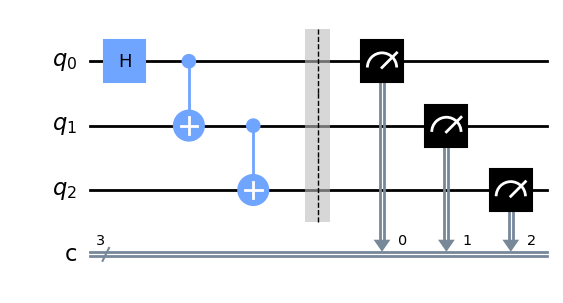

In [10]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))
qc = meas.compose(circ, range(3), front=True)
qc.draw('mpl')

In [11]:
from qiskit import transpile
from qiskit_aer import AerSimulator
backend = AerSimulator()
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

In [12]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 532, '000': 492}


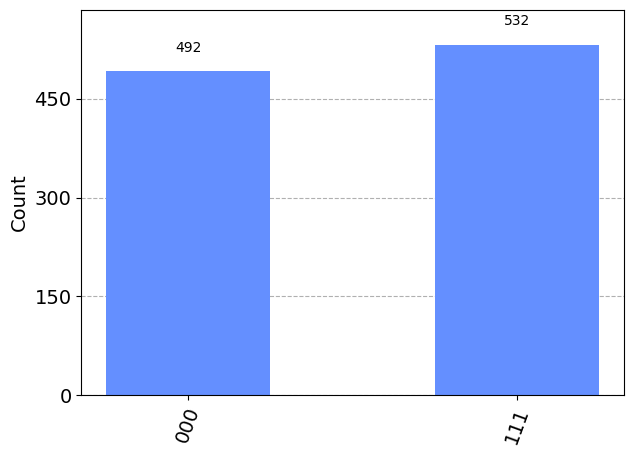

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [14]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright